In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Restaurant Reviews | sentiment analysis of social media posts
 link for Data source : https://www.kaggle.com/code/maafermansour/resturant-reviews-for-beginners-10algo

## importing and inspecting data

In [3]:
data = pd.read_csv(r"D:\Ai\DEPI\Technical\final project\Final\Updated_Restaurant_Reviews_Manual5000-.csv")
data

,Review,Liked
0,"Terrible experience, won't be coming back.",0.0
1,"I had high hopes, but the food was really disa...",0.0
2,"The food was absolutely amazing, I cherished it!",1.0
3,I can't wait to come back! Highly recommend.,1.0
4,"Everything was just perfect, from the starters...",1.0
...,...,...
4176,I dressed up to be treated so rudely!,0.0
4177,It was probably dirt.,0.0
4178,"Love this venue, hits the spot when I want som...",1.0
4179,I ordered the Lemon raspberry ice cocktail whi...,1.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4181 entries, 0 to 4180
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Review  3805 non-null   object 
 1   Liked   3809 non-null   float64
dtypes: float64(1), object(1)
memory usage: 65.5+ KB


In [5]:
data.shape

(4181, 2)

## Exploring data

In [6]:
data["Liked"].value_counts()

Liked
1.0    1934
0.0    1875
Name: count, dtype: int64

<Axes: xlabel='Liked', ylabel='count'>

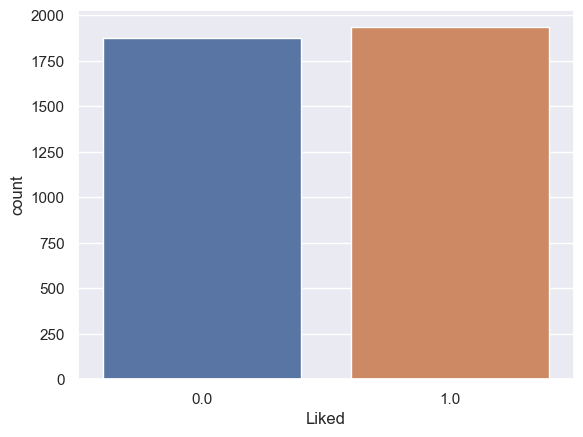

In [7]:
sns.countplot(x=data["Liked"])

In [8]:
data.isna().sum()

Review    376
Liked     372
dtype: int64

<Axes: >

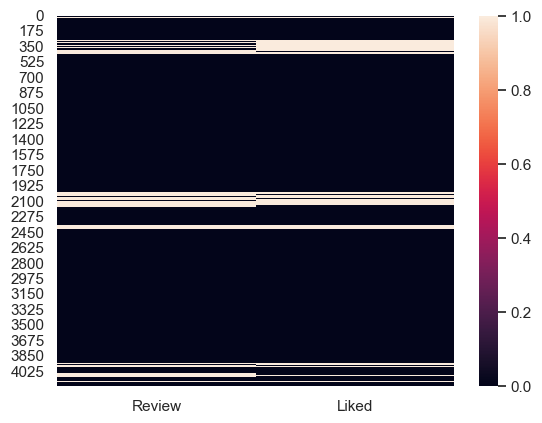

In [9]:
sns.heatmap(data.isna())

In [10]:
data.dropna(inplace=True)

<Axes: >

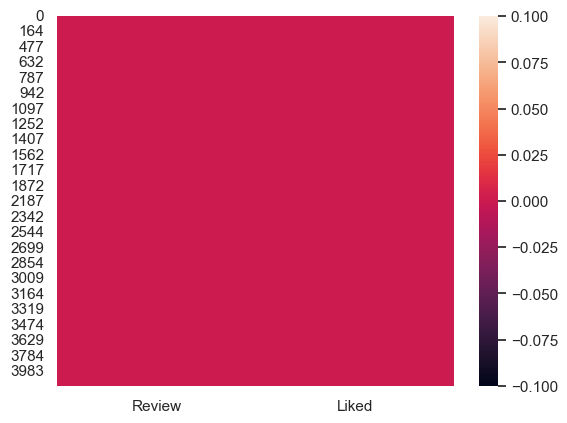

In [11]:
sns.heatmap(data.isna())

In [12]:
data.isna().sum()

Review    0
Liked     0
dtype: int64

In [13]:
data.reset_index(drop=True, inplace=True)

In [14]:
data.shape

(3711, 2)

In [16]:
data["count of letter"]=data["Review"].apply(len)

In [17]:
data

,Review,Liked,count of letter
0,"Terrible experience, won't be coming back.",0.0,42
1,"I had high hopes, but the food was really disa...",0.0,56
2,"The food was absolutely amazing, I cherished it!",1.0,48
3,I can't wait to come back! Highly recommend.,1.0,44
4,"Everything was just perfect, from the starters...",1.0,63
...,...,...,...
3706,I dressed up to be treated so rudely!,0.0,37
3707,It was probably dirt.,0.0,21
3708,"Love this venue, hits the spot when I want som...",1.0,99
3709,I ordered the Lemon raspberry ice cocktail whi...,1.0,69


In [18]:
data.iloc[data["count of letter"].idxmax()][0]

'The problem I have is that they charge $11.99 for a sandwich that is no bigger than a Subway sub (which offers better and more amount of vegetables).'

In [19]:
from wordcloud import WordCloud


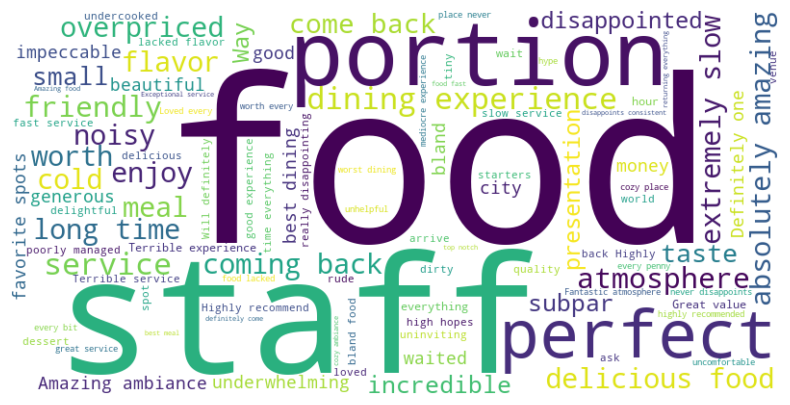

In [20]:
all_reviews = ' '.join(data['Review'].dropna().astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100, contour_color='black').generate(all_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.show()

## pre-processing data (NLTK Text Data cleannig)

In [21]:
data ['Review' ][0]

"Terrible experience, won't be coming back."

In [22]:
import nltk

In [23]:
from nltk.corpus import stopwords

In [24]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Soly\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
print (stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [26]:
s = data ['Review' ][0]
s

"Terrible experience, won't be coming back."

In [27]:
import re
s =re.sub('[^a-zA-Z]'," ",s)
s

'Terrible experience  won t be coming back '

In [28]:
s = s.lower()
s

'terrible experience  won t be coming back '

In [29]:
s = s.split()
s

['terrible', 'experience', 'won', 't', 'be', 'coming', 'back']

In [30]:
temp = []

for word  in s:
    if word not in stopwords.words('english'):
        temp.append(word)

temp

['terrible', 'experience', 'coming', 'back']

In [31]:
[ word for word in s if word not in stopwords.words('english')]

['terrible', 'experience', 'coming', 'back']

In [32]:
s = ' '.join(temp)
s

'terrible experience coming back'

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

In [34]:
cv = CountVectorizer()

In [35]:
cv.fit_transform(s.split()).toarray()

array([[0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0]], dtype=int64)

In [36]:
# putting it all together

corpus = []

for i  in range(len(data)):
    s = re.sub('[^a-zA-Z]'," ",data ['Review' ][i])
    s = s.lower()
    s = s.split()
    s = [ word for word in s if word not in stopwords.words('english')]
    s = ' '.join(s)
#     s = ps.stem(s)
    corpus.append(s)

corpus

['terrible experience coming back',
 'high hopes food really disappointing',
 'food absolutely amazing cherished',
 'wait come back highly recommend',
 'everything perfect starters desserts',
 'terrible experience coming back',
 'suggest restaurant',
 'food absolutely amazing adored',
 'food overpriced underwhelming',
 'terrible experience coming back',
 'cozy place delicious food',
 'suggest restaurant',
 'staff rude atmosphere uninviting',
 'portions small taste subpar',
 'everything perfect starters desserts',
 'good experience place dirty poorly managed',
 'food absolutely amazing loved',
 'high hopes food really disappointing',
 'everything perfect starters desserts',
 'food overpriced underwhelming',
 'best dining experience long time',
 'suggest restaurant',
 'terrible experience coming back',
 'good experience place dirty poorly managed',
 'waited hour food worth',
 'definitely one favorite spots city',
 'portions small taste subpar',
 'way noisy enjoy meal',
 'food absolutely 

In [37]:
cv=CountVectorizer()
cv.fit_transform(corpus).toarray().shape

(3711, 1911)

In [38]:
X = cv.fit_transform(corpus).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [39]:
y = data ['Liked'].values
y

array([0., 0., 1., ..., 1., 1., 0.])

In [40]:
from sklearn.model_selection import train_test_split


In [41]:
X_train ,X_test, y_train ,y_test = train_test_split (X ,y ,test_size=0.25 ,random_state=42)

In [42]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [43]:
y_train

array([0., 1., 0., ..., 0., 0., 1.])

# Modelieng

In [44]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression()

In [45]:
LR_model.fit(X_train , y_train)

LogisticRegression()

In [46]:
y_pred = LR_model.predict(X_test)

In [47]:
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [1. 1.]
 [1. 1.]
 [0. 0.]]


# model evaluation

In [48]:
from sklearn.metrics import confusion_matrix , accuracy_score

In [49]:
cm = confusion_matrix(y_test , y_pred)
cm

array([[432,  22],
       [ 30, 444]], dtype=int64)

In [50]:
acu_score = accuracy_score(y_test , y_pred)
acu_score

0.9439655172413793

<Axes: xlabel='Liked', ylabel='count of letter'>

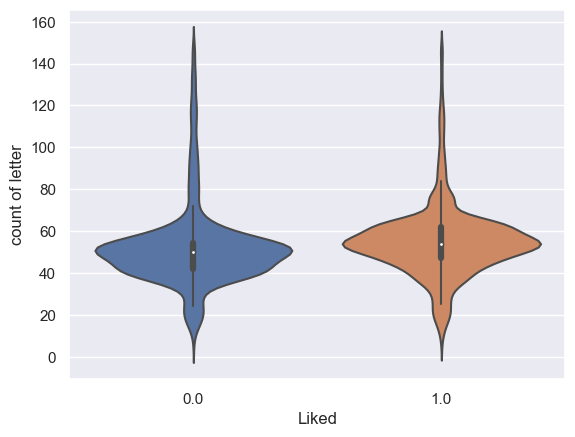

In [51]:
sns.violinplot(x=data["Liked"], y=data["count of letter"])

In [52]:
X_test_df = pd.DataFrame(X_test, index=data.index[y_train.shape[0]:])
test_indices = X_test_df.index
print(test_indices)

RangeIndex(start=2783, stop=3711, step=1)


In [53]:
v =data.iloc[test_indices[0:]]

<Axes: ylabel='count of letter'>

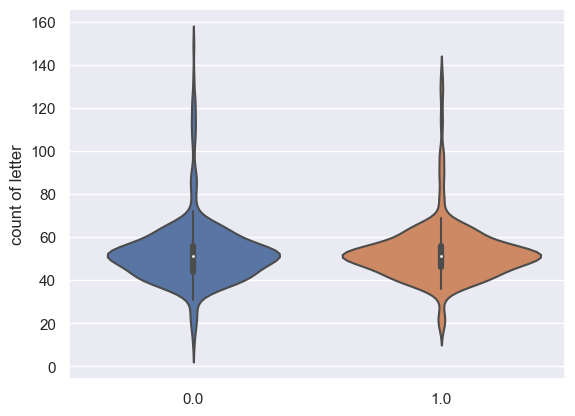

In [54]:
sns.violinplot(x=y_pred, y= v["count of letter"])

In [55]:
v

,Review,Liked,count of letter
2783,This venue lacked style!!,0.0,25
2784,The sangria was about half of a glass wine ful...,0.0,72
2785,Don't bother coming here.,0.0,25
2786,"The meat was pretty dry, I had the sliced bris...",0.0,66
2787,"The building itself seems pretty neat, the bat...",0.0,100
...,...,...,...
3706,I dressed up to be treated so rudely!,0.0,37
3707,It was probably dirt.,0.0,21
3708,"Love this venue, hits the spot when I want som...",1.0,99
3709,I ordered the Lemon raspberry ice cocktail whi...,1.0,69


In [56]:
v["prediction"] = y_pred

In [57]:
v

,Review,Liked,count of letter,prediction
2783,This venue lacked style!!,0.0,25,0.0
2784,The sangria was about half of a glass wine ful...,0.0,72,0.0
2785,Don't bother coming here.,0.0,25,0.0
2786,"The meat was pretty dry, I had the sliced bris...",0.0,66,0.0
2787,"The building itself seems pretty neat, the bat...",0.0,100,0.0
...,...,...,...,...
3706,I dressed up to be treated so rudely!,0.0,37,0.0
3707,It was probably dirt.,0.0,21,0.0
3708,"Love this venue, hits the spot when I want som...",1.0,99,1.0
3709,I ordered the Lemon raspberry ice cocktail whi...,1.0,69,1.0


In [58]:
v["Xnor"]=range(len(v))



In [59]:
v["Xnor"] = 0 
v.loc[v["prediction"] == v["Liked"], "Xnor"] = 1  


In [60]:
v["Xnor"][v["Xnor"]>1]=0
v

,Review,Liked,count of letter,prediction,Xnor
2783,This venue lacked style!!,0.0,25,0.0,1
2784,The sangria was about half of a glass wine ful...,0.0,72,0.0,1
2785,Don't bother coming here.,0.0,25,0.0,1
2786,"The meat was pretty dry, I had the sliced bris...",0.0,66,0.0,1
2787,"The building itself seems pretty neat, the bat...",0.0,100,0.0,1
...,...,...,...,...,...
3706,I dressed up to be treated so rudely!,0.0,37,0.0,1
3707,It was probably dirt.,0.0,21,0.0,1
3708,"Love this venue, hits the spot when I want som...",1.0,99,1.0,1
3709,I ordered the Lemon raspberry ice cocktail whi...,1.0,69,1.0,1


In [61]:
v.groupby("prediction")["Review"].count()

prediction
0.0    462
1.0    466
Name: Review, dtype: int64

In [62]:
v.groupby("Liked")["Review"].count()

Liked
0.0    491
1.0    437
Name: Review, dtype: int64

In [65]:
def prepro(new_stat):
    new_stat = re.sub('[^a-zA-Z]'," ",new_stat)
    new_stat = new_stat.lower()
    new_stat = new_stat.split()
    new_stat = [ word for word in new_stat if word not in stopwords.words('english')]
    new_stat = ' '.join(new_stat)
    return new_stat

In [66]:
nnnew_review = input("enter review :")
prepro(nnnew_review)

result = LR_model.predict(cv.transform([nnnew_review]).toarray())
if result == 1:
    print("positive review")
else:
    print("negative review")





enter review :the don't look good and the service were bad
negative review


In [65]:
import joblib

joblib.dump(LR_model, r'D:\Ai\DEPI\Technical\final project\Sentiment_Analysis_DEPI.pkl')


['D:\\Ai\\DEPI\\Technical\\final project\\Sentiment_Analysis_DEPI.pkl']